In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [2]:
df=pd.read_excel('rappi_case_data.xlsx')
df

,Country Code,Store Name,Order ID,Date Order Created,Hour Order Created,Hour Order Closed,Order Value,Payment Method,Order State,Microzone,LAT,LNG,Order Cost
0,CO,Presto_Presto Avenida Sexta CALI,80924151,2020-02-05,17:20:38,18:16:19,26714.00,cash,FINISHED,Zona Oriente CLO,3.448188,-76.498130,6574
1,CO,Eliz Ice Cream_Eliz Ice Cream,83192496,2020-02-19,15:39:55,16:28:11,20614.00,cash,FINISHED,Zona Oriente CLO,3.448188,-76.498130,5759
2,CO,Presto_Presto Avenida Sexta CALI,89441970,2020-03-25,16:06:28,16:44:05,60714.08,cash,FINISHED,Norte CLO,3.479872,-76.515764,6154
3,CO,McDonald's_McDonald's Colina Campestre,19358661,2018-08-11,09:08:27,NaN,43414.00,cash,CANCELED_BY_OPS,Calatrava BOG4,4.719616,-74.075622,5785
4,CO,Frisby - Pollo_Frisby Porto Alegre,29579139,2018-12-26,10:39:04,NaN,50014.00,cc,CANCELED_BY_APPLICATION,Calatrava BOG4,4.719616,-74.075622,5619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,CO,Steak House_Steak House,37121817,2019-03-12,16:41:27,NaN,12294.00,cash,CANCELED_BY_FRAUD,Cabecera BGA1,7.115248,-73.105086,5486
7996,CO,Mr Hulk_Mr Hulk,59040293,2019-08-13,17:02:35,NaN,22614.00,cash,CANCELED_BY_FRAUD,Centro BGA1,7.103452,-73.117190,4952
7997,CO,Mr Hulk_Mr Hulk,59040446,2019-08-13,17:03:15,NaN,27614.00,cash,CANCELED_BY_FRAUD,Centro BGA1,7.103452,-73.117190,5761
7998,CO,Dunkin Donuts_Dunkin Donuts El Tesoro,71249917,2019-11-22,14:20:28,NaN,22614.00,cash,CANCELED_BY_FRAUD,Poblado Norte MDE,6.208304,-75.554323,2020


In [3]:
df.rename(columns=lambda x:x.strip().lower().replace(" ","_"),inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   country_code        8000 non-null   object        
 1   store_name          7981 non-null   object        
 2   order_id            8000 non-null   int64         
 3   date_order_created  8000 non-null   datetime64[ns]
 4   hour_order_created  8000 non-null   object        
 5   hour_order_closed   6828 non-null   object        
 6   order_value         8000 non-null   float64       
 7   payment_method      8000 non-null   object        
 8   order_state         8000 non-null   object        
 9   microzone           7942 non-null   object        
 10  lat                 8000 non-null   float64       
 11  lng                 8000 non-null   float64       
 12  order_cost          8000 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(2), obje

In [5]:
df.country_code.unique()

array(['CO'], dtype=object)

In [6]:
df.store_name.nunique()

2788

In [7]:
df.dropna(subset=['store_name'],inplace=True)

In [8]:
df=df[df.store_name!=False]

In [9]:
df.reset_index(inplace=True)

In [10]:
def brand(x):
    
    # Character to find 
    separator = "-"
    separator2= "_"

    # Using Naive Method 
    pos = None

    for i in range(0, len(x)): 
        if x[i] == separator: 
            pos = i
            break

    if pos == None:
        for i in range(0, len(x)):
            if x[i] == separator2: 
                pos = i
                break

    return (x[:pos].strip())

In [11]:
df.store_name.apply(brand)

0               Presto
1       Eliz Ice Cream
2               Presto
3           McDonald's
4               Frisby
             ...      
7974       Steak House
7975           Mr Hulk
7976           Mr Hulk
7977     Dunkin Donuts
7978     Dunkin Donuts
Name: store_name, Length: 7979, dtype: object

In [12]:
df['Brand'] = df.store_name.apply(brand)

<ipython-input-12-4e5e40c6f835>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Brand'] = df.store_name.apply(brand)


In [13]:
orders = df.groupby('Brand').order_value.sum().sort_values(ascending=False)

In [14]:
orders

Brand
El Corral               13703783.91
KFC                     13504419.10
McDonald's               8751812.18
Papa John's              8622769.10
Home Burgers             7729246.56
                           ...     
La Porchetta                 114.00
Brutal Burger                114.00
Donde Lore Fast Food         114.00
Bomba Arepa                  114.00
Riquisimo                    114.00
Name: order_value, Length: 1252, dtype: float64

In [15]:
df = df[df['order_state'] == 'FINISHED']

In [16]:
df.drop(columns=['index'], inplace=True)
df.reset_index(inplace=True)

In [17]:
df.to_csv('clean_dataset.csv', index_label=False)

In [18]:
df = pd.read_csv('clean_dataset.csv')

In [19]:
df['hour_order_closed'] = pd.to_datetime(df['hour_order_closed'], format="%H:%M:%S")
df['hour_order_created'] = pd.to_datetime(df['hour_order_created'], format="%H:%M:%S")

In [20]:
df['date_order_created'] = pd.to_datetime(df['date_order_created'])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6741 entries, 0 to 6740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               6741 non-null   int64         
 1   country_code        6741 non-null   object        
 2   store_name          6741 non-null   object        
 3   order_id            6741 non-null   int64         
 4   date_order_created  6741 non-null   datetime64[ns]
 5   hour_order_created  6741 non-null   datetime64[ns]
 6   hour_order_closed   6740 non-null   datetime64[ns]
 7   order_value         6741 non-null   float64       
 8   payment_method      6741 non-null   object        
 9   order_state         6741 non-null   object        
 10  microzone           6684 non-null   object        
 11  lat                 6741 non-null   float64       
 12  lng                 6741 non-null   float64       
 13  order_cost          6741 non-null   int64       

In [22]:
df['delivery_time'] = df['hour_order_closed'] - df['hour_order_created']
df['delivery_time']

0      00:55:41
1      00:48:16
2      00:37:37
3      00:18:56
4      00:28:33
         ...   
6736   00:22:06
6737   00:46:13
6738   00:29:02
6739   00:38:37
6740   00:44:03
Name: delivery_time, Length: 6741, dtype: timedelta64[ns]

In [23]:
df['delivery_time'].sort_values(ascending=True)

2892   -1 days +00:51:18
2326   -1 days +02:09:13
3417            00:00:47
1109            00:05:12
4467            00:09:35
              ...       
383             03:40:51
1366            03:47:28
5047            04:42:22
6290            07:41:12
526                  NaT
Name: delivery_time, Length: 6741, dtype: timedelta64[ns]

In [24]:
df.drop(df.index[526], inplace=True)

In [25]:
df['delivery_time'].sort_values(ascending=True)

2892   -1 days +00:51:18
2326   -1 days +02:09:13
3417            00:00:47
1109            00:05:12
4467            00:09:35
              ...       
1020            03:25:33
383             03:40:51
1366            03:47:28
5047            04:42:22
6290            07:41:12
Name: delivery_time, Length: 6740, dtype: timedelta64[ns]

In [26]:
df.reset_index(inplace=True, drop=True)

In [27]:
df.drop(columns={'index'})

,country_code,store_name,order_id,date_order_created,hour_order_created,hour_order_closed,order_value,payment_method,order_state,microzone,lat,lng,order_cost,Brand,delivery_time
0,CO,Presto_Presto Avenida Sexta CALI,80924151,2020-02-05,1900-01-01 17:20:38,1900-01-01 18:16:19,26714.00,cash,FINISHED,Zona Oriente CLO,3.448188,-76.498130,6574,Presto,00:55:41
1,CO,Eliz Ice Cream_Eliz Ice Cream,83192496,2020-02-19,1900-01-01 15:39:55,1900-01-01 16:28:11,20614.00,cash,FINISHED,Zona Oriente CLO,3.448188,-76.498130,5759,Eliz Ice Cream,00:48:16
2,CO,Presto_Presto Avenida Sexta CALI,89441970,2020-03-25,1900-01-01 16:06:28,1900-01-01 16:44:05,60714.08,cash,FINISHED,Norte CLO,3.479872,-76.515764,6154,Presto,00:37:37
3,CO,Samue In_Samue In,14038283,2018-05-14,1900-01-01 18:17:28,1900-01-01 18:36:24,35114.00,cash,FINISHED,Riomar y Altoprado BAQ1,11.007862,-74.819441,4032,Samue In,00:18:56
4,CO,Cosechas - Batidos_Cosechas 53,15906617,2018-06-17,1900-01-01 06:05:02,1900-01-01 06:33:35,10014.00,cash,FINISHED,Riomar y Altoprado BAQ1,11.004099,-74.813188,4906,Cosechas,00:28:33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6735,CO,Subway_63481 Subway Manga,77875388,2020-01-15,1900-01-01 15:01:06,1900-01-01 15:23:12,35914.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,2954,Subway,00:22:06
6736,CO,Marco's_Marco's,82016026,2020-02-12,1900-01-01 14:59:34,1900-01-01 15:45:47,48114.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,4864,Marco's,00:46:13
6737,CO,Sándwich Qbano_Sandwich Qbano Ciudad Amurallada,82025658,2020-02-12,1900-01-01 15:33:00,1900-01-01 16:02:02,30414.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,6696,Sándwich Qbano,00:29:02
6738,CO,Presto_Presto San Felipe CTG,85656336,2020-03-04,1900-01-01 15:13:45,1900-01-01 15:52:22,46614.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,5505,Presto,00:38:37


In [28]:
rounded_delivery_time = df.delivery_time.groupby(round(df.delivery_time.dt.seconds/60,0))

(0.0, 200.0)

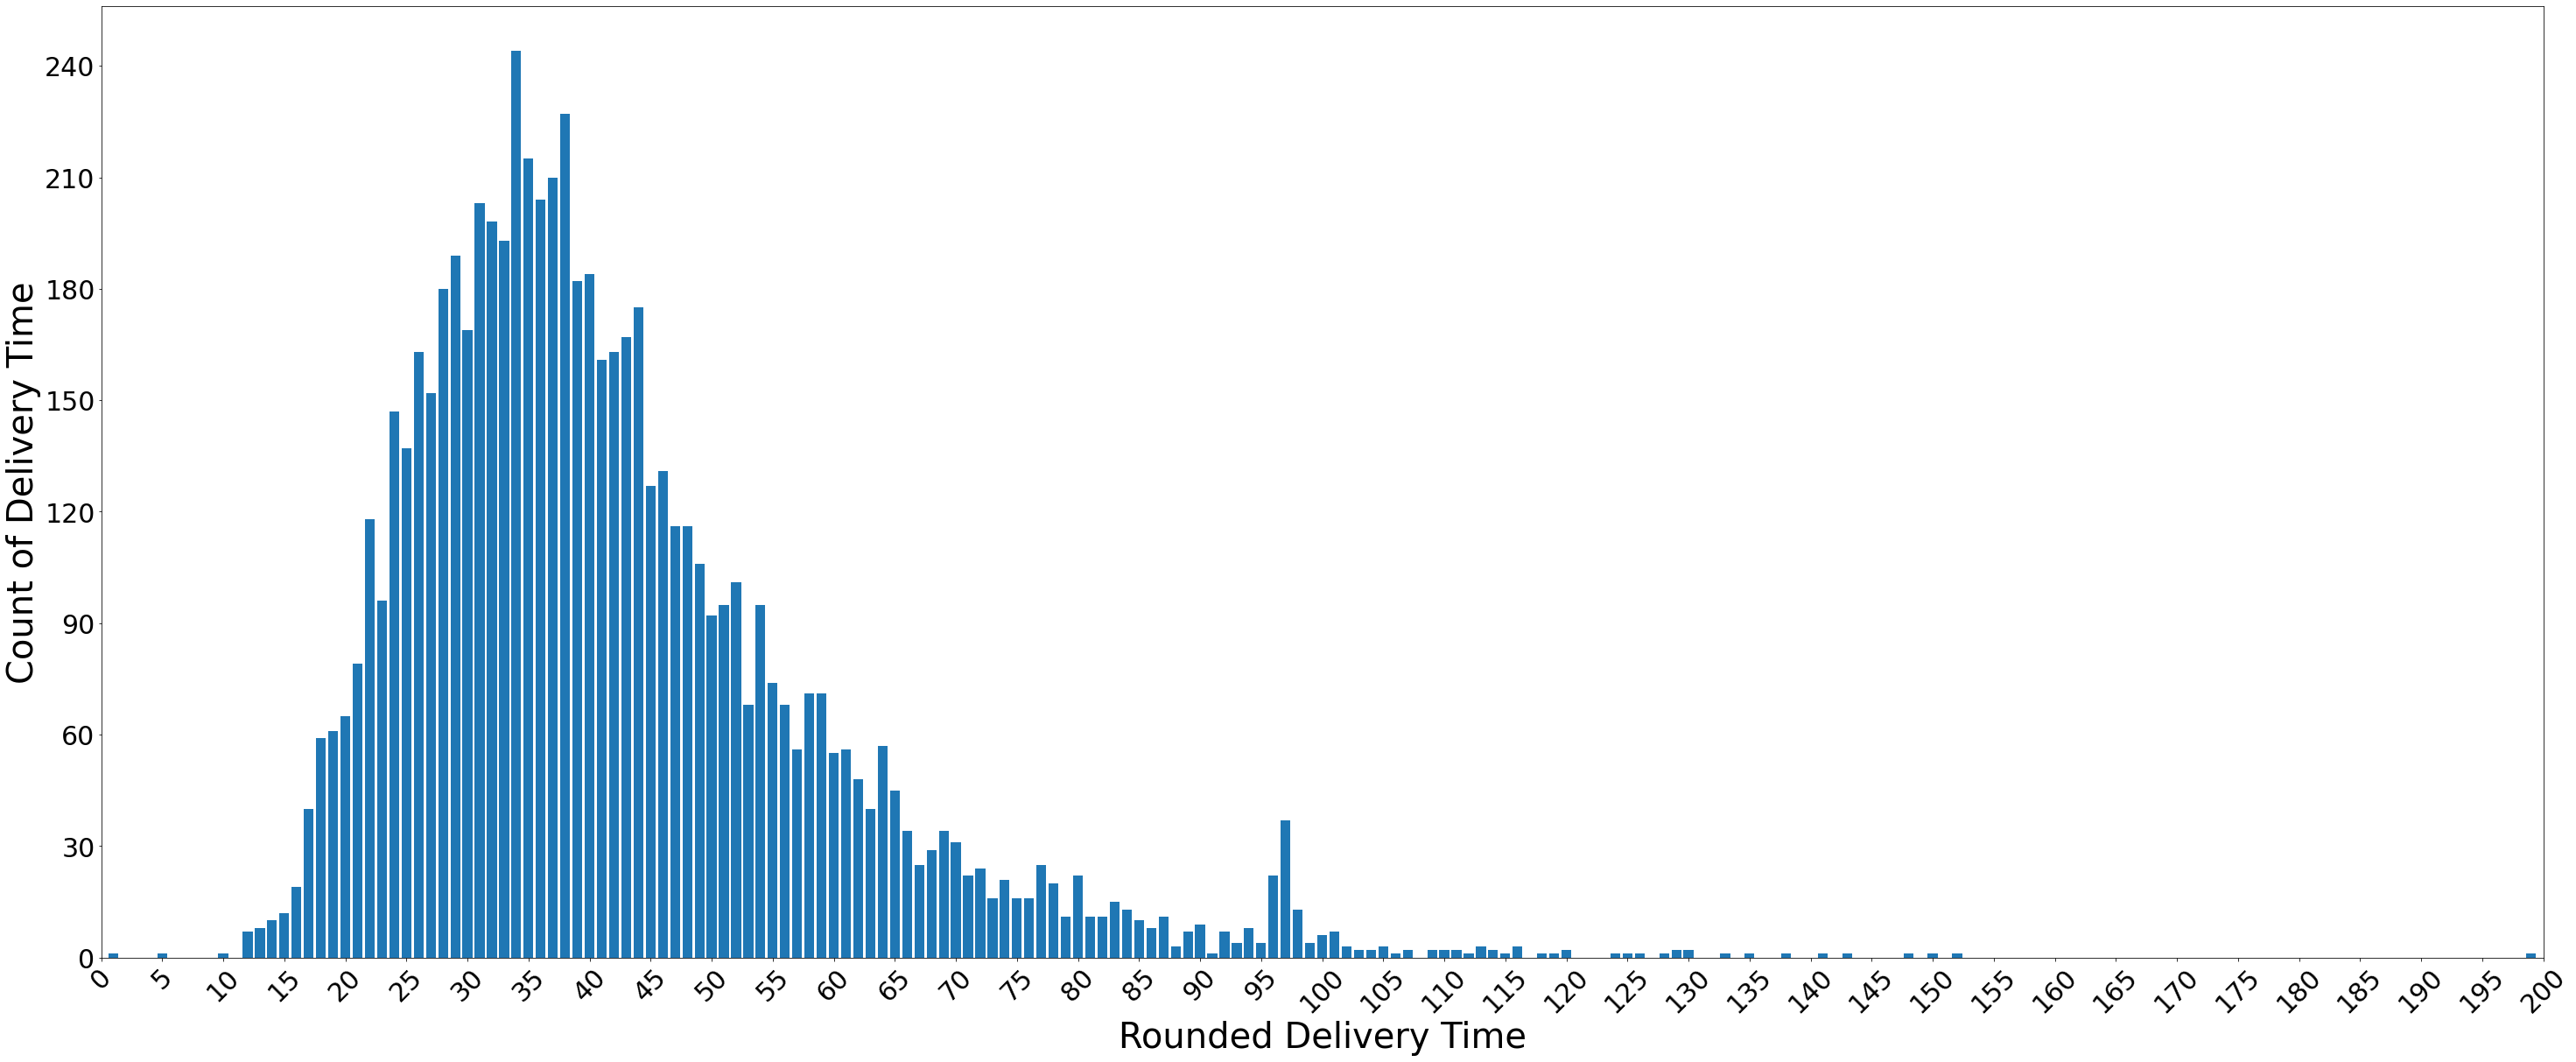

In [29]:
fig, ax = plt.subplots(figsize=(50,20))
plt.bar(rounded_delivery_time.count().index, rounded_delivery_time.count())

plt.xticks(fontsize=30, rotation=45)
plt.yticks(fontsize=30)
plt.xlabel("Rounded Delivery Time", fontsize=40)
plt.ylabel("Count of Delivery Time", fontsize=40)
ax.xaxis.set_major_locator(plt.MaxNLocator(40))
ax.yaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlim(0,200)

In [30]:
df['delivery_time_minutes'] = round(df.delivery_time.dt.seconds/60,0)

In [31]:
std_dev = np.std(df['delivery_time_minutes'])
median = np.median(df['delivery_time_minutes'])
mean = np.mean(df['delivery_time_minutes'])
print('Standard Deviation: ' + str(std_dev))
print('Median: ' + str(median))
print('Mean: ' + str(mean))

Standard Deviation: 18.848290062631555
Median: 38.0
Mean: 42.26261127596439


In [32]:
pd.set_option("max_rows", 84)
df_outliers = df.loc[(df['delivery_time_minutes'] < 99) & (df['delivery_time_minutes'] > 93)]

<AxesSubplot:ylabel='delivery_time_minutes'>

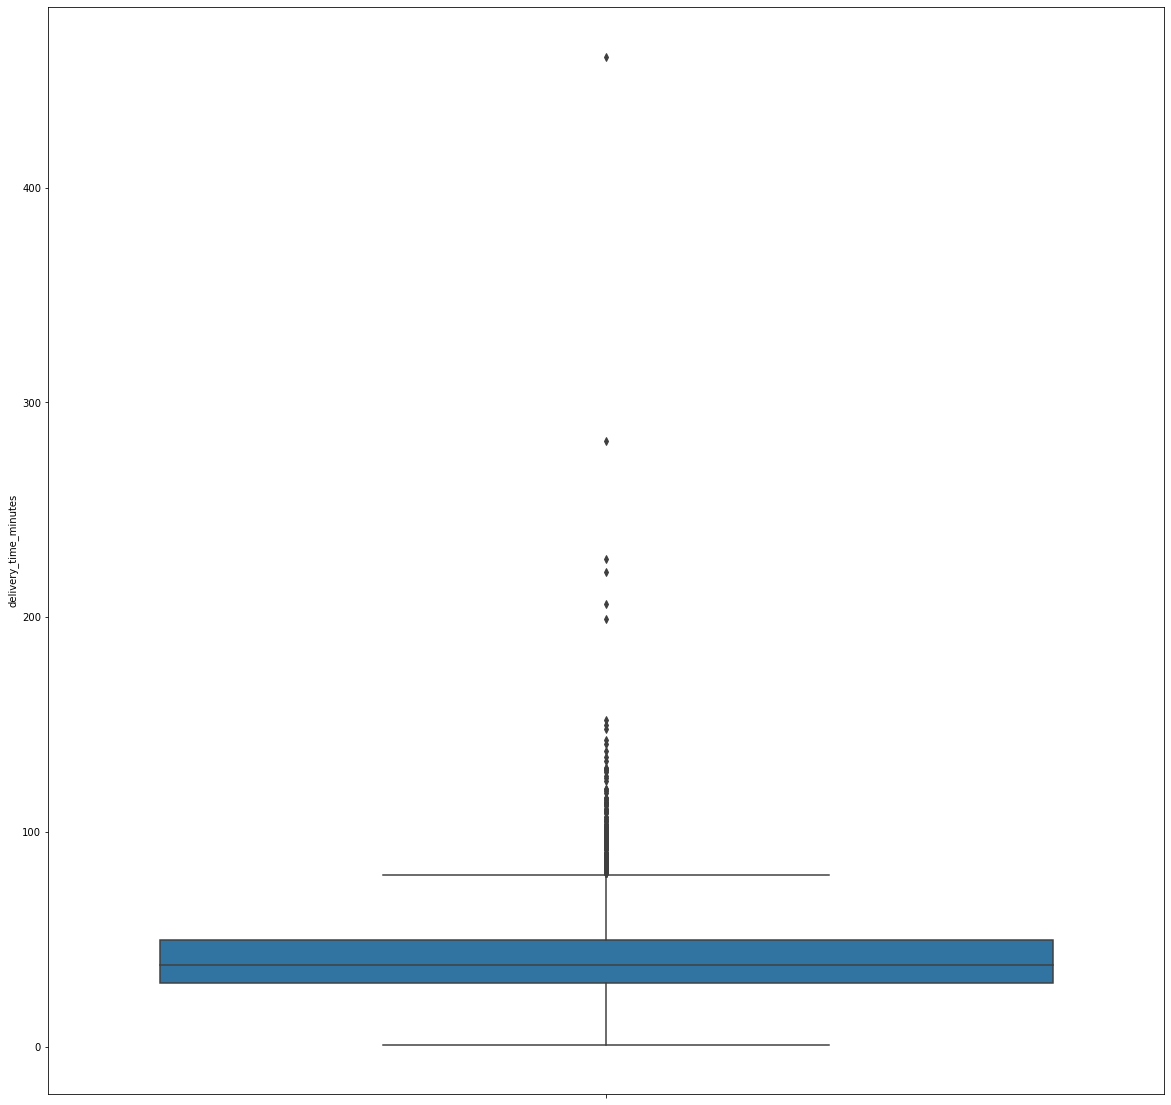

In [33]:
fig, ax = plt.subplots(figsize=(20,20))
sns.boxplot(ax=ax, y='delivery_time_minutes', data=df)

In [34]:
q75, q25 = np.percentile(df['delivery_time_minutes'], [75]), np.percentile(df['delivery_time_minutes'], [25])

iqr = q75 - q25
print(q25, q75)
print(iqr) # 50% of values are between the 25th percentile (q25) and 75th percentile (q75)

boxplot_minimum = q25 - 1.5*iqr
boxplot_maximum = q75 + 1.5*iqr
print(boxplot_minimum, boxplot_maximum) # Any delivery_time_minutes value above 80 is considered an outlier according to the boxplot

[30.] [50.]
[20.]
[0.] [80.]


In [40]:
new_df = df[df['delivery_time_minutes'] <= 80].drop(columns={'index'}, inplace=True)

c:\users\i539797\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


AttributeError: 'NoneType' object has no attribute 'reset_index'

In [41]:
new_df.reset_index(drop=True)

,country_code,store_name,order_id,date_order_created,hour_order_created,hour_order_closed,order_value,payment_method,order_state,microzone,lat,lng,order_cost,Brand,delivery_time,delivery_time_minutes
0,CO,Presto_Presto Avenida Sexta CALI,80924151,2020-02-05,1900-01-01 17:20:38,1900-01-01 18:16:19,26714.00,cash,FINISHED,Zona Oriente CLO,3.448188,-76.498130,6574,Presto,00:55:41,56.0
1,CO,Eliz Ice Cream_Eliz Ice Cream,83192496,2020-02-19,1900-01-01 15:39:55,1900-01-01 16:28:11,20614.00,cash,FINISHED,Zona Oriente CLO,3.448188,-76.498130,5759,Eliz Ice Cream,00:48:16,48.0
2,CO,Presto_Presto Avenida Sexta CALI,89441970,2020-03-25,1900-01-01 16:06:28,1900-01-01 16:44:05,60714.08,cash,FINISHED,Norte CLO,3.479872,-76.515764,6154,Presto,00:37:37,38.0
3,CO,Samue In_Samue In,14038283,2018-05-14,1900-01-01 18:17:28,1900-01-01 18:36:24,35114.00,cash,FINISHED,Riomar y Altoprado BAQ1,11.007862,-74.819441,4032,Samue In,00:18:56,19.0
4,CO,Cosechas - Batidos_Cosechas 53,15906617,2018-06-17,1900-01-01 06:05:02,1900-01-01 06:33:35,10014.00,cash,FINISHED,Riomar y Altoprado BAQ1,11.004099,-74.813188,4906,Cosechas,00:28:33,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,CO,Subway_63481 Subway Manga,77875388,2020-01-15,1900-01-01 15:01:06,1900-01-01 15:23:12,35914.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,2954,Subway,00:22:06,22.0
6470,CO,Marco's_Marco's,82016026,2020-02-12,1900-01-01 14:59:34,1900-01-01 15:45:47,48114.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,4864,Marco's,00:46:13,46.0
6471,CO,Sándwich Qbano_Sandwich Qbano Ciudad Amurallada,82025658,2020-02-12,1900-01-01 15:33:00,1900-01-01 16:02:02,30414.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,6696,Sándwich Qbano,00:29:02,29.0
6472,CO,Presto_Presto San Felipe CTG,85656336,2020-03-04,1900-01-01 15:13:45,1900-01-01 15:52:22,46614.00,cash,FINISHED,Pie de popa CTG,10.416469,-75.533150,5505,Presto,00:38:37,39.0


In [44]:
brand = new_df.groupby('Brand')

In [58]:
minutes = brand.delivery_time_minutes.median().reset_index()
count = brand.delivery_time_minutes.count().reset_index()

count = count.rename(columns={'delivery_time_minutes':'delivery_min_COUNT'}).set_index('Brand')

minutes = minutes.rename(columns={'delivery_time_minutes':'delivery_min_median'}).set_index('Brand')
pd.set_option('max_rows', 1000)

minutes = minutes.merge(count,how='inner',left_index=True,right_index=True)

minutes

,delivery_min_median,delivery_min_COUNT
Brand,,
#Pollos,52.5,4
123Wok,42.0,39
9 am Desayuno,36.0,1
90 Calentados,51.5,6
Abruzzo,37.0,1
...,...,...
il forno_il forno,80.0,1
kentia,41.0,1
mezzaluna,51.0,1


In [59]:
minutes.loc['KFC']

delivery_min_median     34.0
delivery_min_COUNT     163.0
Name: KFC, dtype: float64

In [60]:
tenet = minutes[minutes['delivery_min_COUNT'] >= 10]
tenet

,delivery_min_median,delivery_min_COUNT
Brand,,
123Wok,42.0,39
Afternoon Tea Colombia,35.0,15
Archies,37.5,48
Aurelio Pizzería,34.0,15
Bimbi,33.0,12
Blue Berry Açai,31.0,13
Buffalo Wings,44.0,45
Bun,28.0,13
Burger Grill,38.0,12


In [67]:
selected_restaurants = tenet[tenet['delivery_min_median'] <= 35]
selected_restaurants

,delivery_min_median,delivery_min_COUNT
Brand,,
Afternoon Tea Colombia,35.0,15
Aurelio Pizzería,34.0,15
Bimbi,33.0,12
Blue Berry Açai,31.0,13
Bun,28.0,13
Chocology,29.0,10
Cosechas,28.0,61
Delirato,26.0,17
Di Lucca To Go,35.0,38
